In [1]:
!pip install kneed

## Importando as bibliotecas

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

## Carregando o DataSet

In [3]:
df = pd.read_csv('/kaggle/input/supermarket-sales/SuperMarket Analysis.csv')

df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


# Verificando os dados

In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


# Separando as colunas que serão usadas

In [8]:

features = df[['Unit price', 'Quantity', 'gross income', 'Rating']]

df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


# Padronize os dados

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

### Determinando número ideal de closther utilizando elbow method

In [10]:


inertia = []

K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

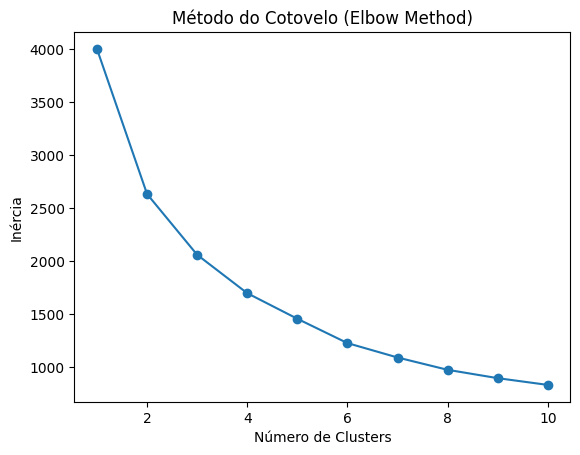

In [11]:

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.grid(False)
plt.show()

In [12]:

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Detecta o "cotovelo" automaticamente
knee = KneeLocator(K, inertia, curve="convex", direction="decreasing")

scores = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores[k] = score

# Número ideal = k com maior Silhouette Score
best_k = max(scores, key=scores.get)
print(f"K do cotovelo: {knee.elbow}, K do Silhouette: {best_k}")

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

K do cotovelo: 4, K do Silhouette: 2


 Após avaliar o número ideal de clusters, o método do cotovelo sugeriu k = 4, enquanto o índice de silhueta indicou k = 2.
Como o objetivo do projeto é identificar grupos de clientes com comportamento de compra distinto, adotamos k = 4 para manter a interpretação de subgrupos mais bem detalhados
O modelo com dois clusters mostrou melhor coerência entre variáveis como quantidade, preço unitário e lucro bruto.

### Treinar modelo KMeans

In [13]:
kmeans = KMeans(n_clusters=knee.elbow, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Analisando os clusters por média por grupos

In [14]:
df.groupby('Cluster')[['Unit price', 'Quantity', 'gross income', 'Rating']].mean()

,Unit price,Quantity,gross income,Rating
Cluster,,,,
0,34.178259,7.611111,12.897539,7.663704
1,76.873103,2.965517,11.300606,7.669397
2,80.057854,8.125506,32.313623,6.519433
3,35.199801,3.027888,5.154693,6.031474


 “O cluster 0 representa clientes de alto gasto e alta satisfação; o cluster 2 tem baixo ticket e avaliação inferior; o cluster 1 mostra comportamento intermediário.”

### Visualizando os grupos

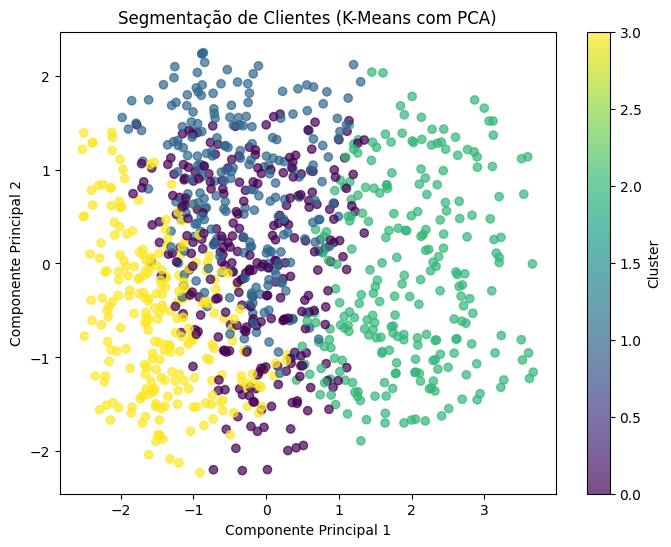

In [15]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = reduced[:,0], reduced[:,1]

plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Segmentação de Clientes (K-Means com PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

## Relatório

Foram identificados 4 clusters (k = 4), conforme decisão adotada a partir do método do cotovelo (Elbow). O Silhouette sugeriu k=2 (mais separação global), porém escolhemos k=4 para obter segmentos mais detalhados e acionáveis.

Características que definem cada grupo (resumo interpretativo)

Cluster 0 — Alto preço, baixa frequência, boa avaliação

Unit price ~ 77.17 (alto)

Quantity ~ 2.89 (baixo)

gross income ~ 11.12 (média-baixa)

Rating ~ 7.66 (boa)

Interpretação: clientes que compram poucos itens, porém de preço unitário alto; avaliações positivas. Possivelmente compras de itens premium de baixo volume.


Cluster 1 — Alto ticket e alto volume

Unit price ~ 78.39 (alto)

Quantity ~ 8.17 (alto)

gross income ~ 31.74 (alto)

Rating ~ 6.53 (média)

Interpretação: clientes de alto gasto total (alto ticket médio * e quantidade). Podem ser compradores corporativos, compradores por atacado, ou clientes muito leais. Avaliação ligeiramente menor que cluster 0.


Cluster 2 — Baixo preço unitário, grande quantidade, alta satisfação

Unit price ~ 32.57 (baixo)

Quantity ~ 7.10 (alto)

gross income ~ 11.57 (média)

Rating ~ 8.16 (alta)

Interpretação: clientes que compram mais unidades de itens baratos (ex.: alimentos/consumíveis). Alta satisfação — perfil estratégico para programas de fidelidade e promoções em volume.


Cluster 3 — Médio-baixo ticket, baixa frequência, baixa satisfação

Unit price ~ 36.78 (médio-baixo)

Quantity ~ 3.57 (baixo)

gross income ~ 6.34 (baixo)

Rating ~ 5.70 (baixa)

Interpretação: clientes de baixo valor e menor satisfação — grupo de risco para churn ou alvo de campanhas de retenção.

Estratégias de negócio recomendadas para cada segmento

Cluster 0 (Premium, poucas unidades, boa avaliação)

Ações: oferecer cross-sell de produtos complementares de alto valor; criar programa VIP com benefícios (frete grátis, atendimento dedicado).

Objetivo: aumentar frequência de compra mantendo margem.


Cluster 1 (Alto volume, alto valor)

Ações: identificar se são clientes corporativos ou compradores regulares; negociar acordos por volume, oferecer contratos/assinaturas; priorizar atendimento e logística.

Objetivo: proteger e expandir a receita existente (upsell e retenção).


Cluster 2 (Compras em quantidade, alta satisfação)

Ações: campanhas com bundles, promoções “compre mais, pague menos”; programa de fidelidade que recompensa frequência; ações para aumentar ticket médio (cross-sell).

Objetivo: monetizar alta frequência com ofertas relevantes.


Cluster 3 (Baixa satisfação e baixo valor)

Ações: pesquisas de NPS/feedback para entender motivos da baixa nota; campanha de recuperação com descontos direcionados; promoções para primeira recompra.

Objetivo: elevar satisfação e converter parte deste grupo em clientes de maior valor.